<a href="https://colab.research.google.com/github/Nmg1994/Flood_Susceptibility_Model/blob/main/Flood_susceptibility_mapping_using_machine_learning_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
pip install rasterio

In [ ]:
pip install graphviz

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import math
from matplotlib.pyplot import figure

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn import tree
import graphviz
import sklearn.metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder
import rasterio
from sklearn.metrics import jaccard_score
from scipy.stats import spearmanr
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

In [6]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
All_points =rasterio.open('/content/drive/My Drive/flood input data/Flood_Inventory_Map.tif')
Slope =rasterio.open('/content/drive/My Drive/flood input data/Slope.tif')
Dis_rivers =rasterio.open('/content/drive/My Drive/flood input data/Dis_rivers.tif')
Rainfall =rasterio.open('/content/drive/My Drive/flood input data/CV_rainfall.tif')
NDMI =rasterio.open('/content/drive/My Drive/flood input data/NDMI.tif')
Aspect =rasterio.open('/content/drive/My Drive/flood input data/Aspect.tif')
Drainage_density =rasterio.open('/content/drive/My Drive/flood input data/Drainage_density.tif')
Plan_curvature =rasterio.open('/content/drive/My Drive/flood input data/Plan_curvature.tif')
Profile_curvature =rasterio.open('/content/drive/My Drive/flood input data/Profile_curvature.tif')
TWI =rasterio.open('/content/drive/My Drive/flood input data/TWI.tif')
Roughness =rasterio.open('/content/drive/My Drive/flood input data/Roughness.tif')
Lithology =rasterio.open('/content/drive/My Drive/flood input data/Lithology.tif')
Soil =rasterio.open('/content/drive/My Drive/flood input data/Soil.tif')
Land_cover =rasterio.open('/content/drive/My Drive/flood input data/Land_cover.tif')

All_points_arr = All_points.read(1)
Slope_arr = Slope.read(1)
Dis_rivers_arr = Dis_rivers.read(1)
Rainfall_arr = Rainfall.read(1)
NDMI_arr = NDMI.read(1)
Aspect_arr = Aspect.read(1)
Drainage_density_arr = Drainage_density.read(1)
Plan_curvature_arr = Plan_curvature.read(1)
Profile_curvature_arr = Profile_curvature.read(1)
TWI_arr = TWI.read(1)
Roughness_arr = Roughness.read(1)
Lithology_arr = Lithology.read(1)
Soil_arr = Soil.read(1)
Land_cover_arr = Land_cover.read(1)

print(All_points_arr.shape)

(7893, 7123)


In [8]:
All_points_arr = All_points_arr.reshape(-1,1)
Slope_arr = Slope_arr.reshape(-1,1)
Dis_rivers_arr = Dis_rivers_arr.reshape(-1,1)
Rainfall_arr = Rainfall_arr.reshape(-1,1)
NDMI_arr = NDMI_arr.reshape(-1,1)
Aspect_arr = Aspect_arr.reshape(-1,1)
Drainage_density_arr = Drainage_density_arr.reshape(-1,1)
Plan_curvature_arr = Plan_curvature_arr.reshape(-1,1)
Profile_curvature_arr = Profile_curvature_arr.reshape(-1,1)
TWI_arr = TWI_arr.reshape(-1,1)
Roughness_arr = Roughness_arr.reshape(-1,1)
Lithology_arr = Lithology_arr.reshape(-1,1)
Soil_arr = Soil_arr.reshape(-1,1)
Land_cover_arr = Land_cover_arr.reshape(-1,1)

Data_indices = np.argwhere(All_points_arr != All_points.nodata) # this was done for separating the pixels with data from no-data ones
flood_indices = np.argwhere(All_points_arr == 1)
non_flood_indices = np.argwhere(All_points_arr == 0)

print("Data_indices shape: ", Data_indices.shape)
print("flood_indices shape:", flood_indices.shape)
print("non_flood_indices shape:", non_flood_indices.shape)

Data_indices shape:  (23176447, 2)
flood_indices shape: (180, 2)
non_flood_indices shape: (180, 2)


In [32]:
Slope_whole_study_area = Slope_arr[Data_indices[:,0],0].reshape(-1,1)
Dis_rivers_whole_study_area = Dis_rivers_arr[Data_indices[:,0],0].reshape(-1,1)
Rainfall_whole_study_area = Rainfall_arr[Data_indices[:,0],0].reshape(-1,1)
NDMI_whole_study_area = NDMI_arr[Data_indices[:,0],0].reshape(-1,1)
Aspect_whole_study_area = Aspect_arr[Data_indices[:,0],0].reshape(-1,1)
Drainage_density_whole_study_area = Drainage_density_arr[Data_indices[:,0],0].reshape(-1,1)
Plan_curvature_whole_study_area = Plan_curvature_arr[Data_indices[:,0],0].reshape(-1,1)
Profile_curvature_whole_study_area = Profile_curvature_arr[Data_indices[:,0],0].reshape(-1,1)
TWI_whole_study_area = TWI_arr[Data_indices[:,0],0].reshape(-1,1)
Roughness_whole_study_area = Roughness_arr[Data_indices[:,0],0].reshape(-1,1)
Lithology_whole_study_area = Lithology_arr[Data_indices[:,0],0].reshape(-1,1)
Soil_whole_study_area = Soil_arr[Data_indices[:,0],0].reshape(-1,1)
Land_cover_whole_study_area = Land_cover_arr[Data_indices[:,0],0].reshape(-1,1)

Datasett_whole_study_area=np.concatenate((Slope_whole_study_area, Dis_rivers_whole_study_area, Rainfall_whole_study_area, NDMI_whole_study_area, Aspect_whole_study_area, 
                         Drainage_density_whole_study_area, Plan_curvature_whole_study_area, Profile_curvature_whole_study_area, TWI_whole_study_area, Roughness_whole_study_area,
                         Lithology_whole_study_area, Soil_whole_study_area, Land_cover_whole_study_area), axis = 1)

Datasett_whole_study_area_for_spearman_analysis = Datasett_whole_study_area
print(np.shape(Datasett_whole_study_area))

(23176447, 13)


In [33]:
hot_coded_variables_whole_study_area = Datasett_whole_study_area[:,-3:]
print("hot_coded_variables shape: ", np.shape(hot_coded_variables_whole_study_area))

Dataset_whole_study_area = Datasett_whole_study_area[:,:-3]
print("Dataset_without_categorial_features shape: ", np.shape(Dataset_whole_study_area))

print(np.shape(Dataset_whole_study_area))

number_of_categorial_variables_whole_study_area = 3

enc_whole_study_area = OneHotEncoder(handle_unknown='ignore')

Hot_coded_columns_Total_whole_study_area = np.empty((Dataset_whole_study_area.shape[0], 0))
N_hot_coded_columns_whole_study_area = []

for i in range(number_of_categorial_variables_whole_study_area):
    each_categorial_variable_whole_study_area = np.array(hot_coded_variables_whole_study_area[:,i]).reshape(-1,1)
    Transformed_X = enc_whole_study_area.fit_transform(each_categorial_variable_whole_study_area).toarray()
    N_columns = np.shape(Transformed_X)[1]
    N_hot_coded_columns_whole_study_area.append(N_columns)
    Hot_coded_columns_Total_whole_study_area = np.append(Hot_coded_columns_Total_whole_study_area, Transformed_X, axis = 1)

print("number of columns for each categorial variable [Lithology, Soil, Land Cover]: ", N_hot_coded_columns_whole_study_area)

Processed_dataset_whole_study_area = np.hstack((Dataset_whole_study_area, Hot_coded_columns_Total_whole_study_area))
print("Processed_dataset shape: ", np.shape(Processed_dataset_whole_study_area))

df_whole_study_area = pd.DataFrame(Processed_dataset_whole_study_area, columns = ['Slope',	'Distance from rivers',	'Rainfall',	'NDMI',	'Aspect',	'Drainage density',	'Plan curvature',	'Profile curvature',	'TWI',	'Roughness',	
                                                'Lithology_1', 'Lithology_2', 'Lithology_3', 'Lithology_4', 'Lithology_5',	
                                                'Soil_1', 'Soil_2', 'Soil_3', 'Soil_4',
                                                'Land Cover_1', 'Land Cover_2', 'Land Cover_3', 'Land Cover_4', 'Land Cover_5', 'Land Cover_6', 'Land Cover_7', 'Land Cover_8', 'Land Cover_9', 'Land Cover_10', 'Land Cover_11', 'Land Cover_12', 'Land Cover_13', 'Land Cover_14'])

print(df_whole_study_area)
print(All_points_arr.shape)

hot_coded_variables shape:  (23176447, 3)
Dataset_without_categorial_features shape:  (23176447, 10)
(23176447, 10)
number of columns for each categorial variable [Lithology, Soil, Land Cover]:  [5, 4, 14]
Processed_dataset shape:  (23176447, 33)
              Slope  Distance from rivers   Rainfall      NDMI      Aspect  \
0          3.337111           7033.413574  23.476513 -0.163623  210.963760   
1          4.714065           7028.869141  23.476513 -0.163623  194.036240   
2          6.147248           7024.343750  23.476513  0.131960  201.801407   
3          6.504634           7019.837891  23.476513  0.131960  195.255112   
4          5.710593           7015.351562  23.476513  0.102891  180.000000   
...             ...                   ...        ...       ...         ...   
23176442  24.516314           4179.002441  20.738363  0.136742  322.125031   
23176443  18.018106           4172.997070  20.738363  0.136742  315.000000   
23176444   8.984877           4167.020996  20.73836

In [9]:
flood_non_flood_indices = np.concatenate((flood_indices[:,0], non_flood_indices[:,0]), axis = 0).reshape(-1,1)

flood_non_flood_values = All_points_arr[flood_non_flood_indices,0]
Slope_values = Slope_arr[flood_non_flood_indices,0]
Dis_rivers_values = Dis_rivers_arr[flood_non_flood_indices,0]
Rainfall_values = Rainfall_arr[flood_non_flood_indices,0]
NDMI_values = NDMI_arr[flood_non_flood_indices,0]
Aspect_values = Aspect_arr[flood_non_flood_indices,0]
Drainage_density_values = Drainage_density_arr[flood_non_flood_indices,0]
Plan_curvature_values = Plan_curvature_arr[flood_non_flood_indices,0]
Profile_curvature_values = Profile_curvature_arr[flood_non_flood_indices,0]
TWI_values = TWI_arr[flood_non_flood_indices,0]
Roughness_values = Roughness_arr[flood_non_flood_indices,0]
Lithology_values = Lithology_arr[flood_non_flood_indices,0]
Soil_values = Soil_arr[flood_non_flood_indices,0]
Land_cover_values = Land_cover_arr[flood_non_flood_indices,0]

Datasett=np.concatenate((flood_non_flood_values, Slope_values, Dis_rivers_values, Rainfall_values, NDMI_values, Aspect_values, Drainage_density_values,
                        Plan_curvature_values, Profile_curvature_values, TWI_values, Roughness_values, Lithology_values, Soil_values, Land_cover_values), axis = 1)
print(np.shape(Datasett))

(360, 14)


In [10]:
df_model_inputs = pd.DataFrame(Datasett, columns = ['Flood', 'Slope',	'Distance from rivers',	'Rainfall',	'NDMI',	'Aspect',	'Drainage density',	'Plan curvature',	'Profile curvature',	'TWI',	'Roughness',	
                                                'Lithology', 'Soil', 'Land Cover'])

print(df_model_inputs)
df_model_inputs.to_excel("Model_inputs.xlsx") 

     Flood      Slope  Distance from rivers   Rainfall      NDMI      Aspect  \
0      1.0  24.516314            367.636017  24.544302  0.328638  344.744873   
1      1.0   8.398939            112.500000  24.692160  0.242576  208.300751   
2      1.0   5.111090            100.778221  24.694195  0.176761  243.434952   
3      1.0  29.987591            251.557648  24.534082  0.163435   27.897270   
4      1.0  24.094843            606.346619  24.523865  0.134596   10.304847   
..     ...        ...                   ...        ...       ...         ...   
355    0.0  27.655567           1521.204346  20.669382  0.404455   48.094059   
356    0.0  18.081682           2317.359863  20.778744  0.262845  229.969742   
357    0.0  37.542458           2216.768555  20.697109  0.530120  302.242462   
358    0.0  18.987982           2003.902466  20.648222  0.531309   35.537678   
359    0.0  23.452175           3190.341797  20.774328  0.286315  244.025604   

     Drainage density  Plan curvature  

In [11]:
hot_coded_variables = Datasett[:,-3:]
print("hot_coded_variables shape: ", np.shape(hot_coded_variables))

Dataset = Datasett[:,:-3]
print("Dataset_without_categorial_features shape: ", np.shape(Dataset))

print(np.shape(Dataset))

number_of_categorial_variables = 3

enc = OneHotEncoder(handle_unknown='ignore')

Hot_coded_columns_Total = np.empty((Dataset.shape[0], 0))
N_hot_coded_columns = []

for i in range(number_of_categorial_variables):
    each_categorial_variable = np.array(hot_coded_variables[:,i]).reshape(-1,1)
    Transformed_X = enc.fit_transform(each_categorial_variable).toarray()
    N_columns = np.shape(Transformed_X)[1]
    N_hot_coded_columns.append(N_columns)
    Hot_coded_columns_Total = np.append(Hot_coded_columns_Total, Transformed_X, axis = 1)

print("number of columns for each categorial variable [Lithology, Soil, Land Cover]: ", N_hot_coded_columns)

Processed_dataset = np.hstack((Dataset, Hot_coded_columns_Total))
print("Processed_dataset shape: ", np.shape(Processed_dataset))

#Processed_dataset = np.array(Processed_dataset, dtype="float")
df = pd.DataFrame(Processed_dataset, columns = ['Flood', 'Slope',	'Distance from rivers',	'Rainfall',	'NDMI',	'Aspect',	'Drainage density',	'Plan curvature',	'Profile curvature',	'TWI',	'Roughness',	
                                                'Lithology_1', 'Lithology_2', 'Lithology_3', 'Lithology_4', 'Lithology_5',	
                                                'Soil_1', 'Soil_2', 'Soil_3', 'Soil_4',
                                                'Land Cover_1', 'Land Cover_2', 'Land Cover_3', 'Land Cover_4', 'Land Cover_5', 'Land Cover_6', 'Land Cover_7', 'Land Cover_8', 'Land Cover_9', 'Land Cover_10', 'Land Cover_11', 'Land Cover_12', 'Land Cover_13', 'Land Cover_14'])

print(df)
training_data, testing_data = train_test_split(Processed_dataset, test_size=0.3, shuffle=True, random_state=0)

X_datasets = training_data[:,1:]
Y_datasets = training_data[:,0]
print('X_datasets: ', np.shape(X_datasets))
print('Y_datasets: ', np.shape(Y_datasets))

X_test_datasets = testing_data[:,1:]
Y_test_datasets = testing_data[:,0]
print('X_test_datasets: ', np.shape(X_test_datasets))
print('Y_test_datasets: ', np.shape(Y_test_datasets))

hot_coded_variables shape:  (360, 3)
Dataset_without_categorial_features shape:  (360, 11)
(360, 11)
number of columns for each categorial variable [Lithology, Soil, Land Cover]:  [5, 4, 14]
Processed_dataset shape:  (360, 34)
     Flood      Slope  Distance from rivers   Rainfall      NDMI      Aspect  \
0      1.0  24.516314            367.636017  24.544302  0.328638  344.744873   
1      1.0   8.398939            112.500000  24.692160  0.242576  208.300751   
2      1.0   5.111090            100.778221  24.694195  0.176761  243.434952   
3      1.0  29.987591            251.557648  24.534082  0.163435   27.897270   
4      1.0  24.094843            606.346619  24.523865  0.134596   10.304847   
..     ...        ...                   ...        ...       ...         ...   
355    0.0  27.655567           1521.204346  20.669382  0.404455   48.094059   
356    0.0  18.081682           2317.359863  20.778744  0.262845  229.969742   
357    0.0  37.542458           2216.768555  20.69710

Decision tree (DT) model

In [12]:
parameters = {'max_depth':np.arange(1,30,1), 'min_samples_split':[2,4,6,8,10], 'min_samples_leaf': [1,3,5,7,9]}
DT_classifier = DecisionTreeClassifier(criterion="entropy",random_state=0)
DT_model_gs = GridSearchCV(DT_classifier, parameters, scoring='accuracy', cv=5, return_train_score=True, n_jobs=-1)
DT_model_gs.fit(X_datasets, Y_datasets)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             return_train_score=True, scoring='accuracy')

In [13]:
DT_model_gs.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

ROC-AUC score for test dataset:  0.9628482972136223
Accuracy score for test dataset:  0.9629629629629629
F1 score for test dataset:  0.9649122807017544
Kappa score for test dataset:  0.9256965944272446
jaccard_score for test dataset: 0.9322033898305084


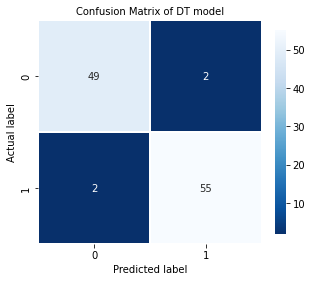

In [14]:
DT_model = DecisionTreeClassifier(criterion="entropy", random_state=0, **DT_model_gs.best_params_)
DT_model.fit(X_datasets, Y_datasets)

Y_test_predict = DT_model.predict(X_test_datasets)
print("ROC-AUC score for test dataset: ", sklearn.metrics.roc_auc_score(Y_test_datasets, Y_test_predict))
print("Accuracy score for test dataset: ", sklearn.metrics.accuracy_score(Y_test_datasets, Y_test_predict))
print("F1 score for test dataset: ", sklearn.metrics.f1_score(Y_test_datasets, Y_test_predict))
print("Kappa score for test dataset: ", sklearn.metrics.cohen_kappa_score(Y_test_datasets, Y_test_predict))
print("jaccard_score for test dataset:", jaccard_score(Y_test_datasets, Y_test_predict))

CM_DT = sklearn.metrics.confusion_matrix(Y_test_datasets, Y_test_predict)
plt.figure(figsize=(5,5))
sns.heatmap(CM_DT, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r', cbar_kws={"shrink": 0.75});
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix of DT model'
plt.title(all_sample_title, size = 10);

In [ ]:
Y_predict_DT_model_whole_study_area = DT_model.predict_proba(Processed_dataset_whole_study_area)

Susc_map_DT = np.empty((56221839,1))
for ind in range(Data_indices.shape[0]):
  Susc_map_DT[Data_indices[ind,0],0]= Y_predict_DT_model_whole_study_area[ind,1]

Susceptibility_map_DT = Susc_map_DT.reshape(7893,7123)


Flood_susceptibility_map_DT = rasterio.open('flood_susceptibility_map_DT.asc',
                                         'w',
                                          driver='GTiff',
                                          height=7893,
                                          width=7123,
                                          count=1,
                                          dtype='float32',
                                          crs='EPSG:32610',
                                          transform = All_points.transform,
                                          nodata = 0 
                                          )
Flood_susceptibility_map_DT.write(Susceptibility_map_DT, 1)
Flood_susceptibility_map_DT.close()

(360, 33)


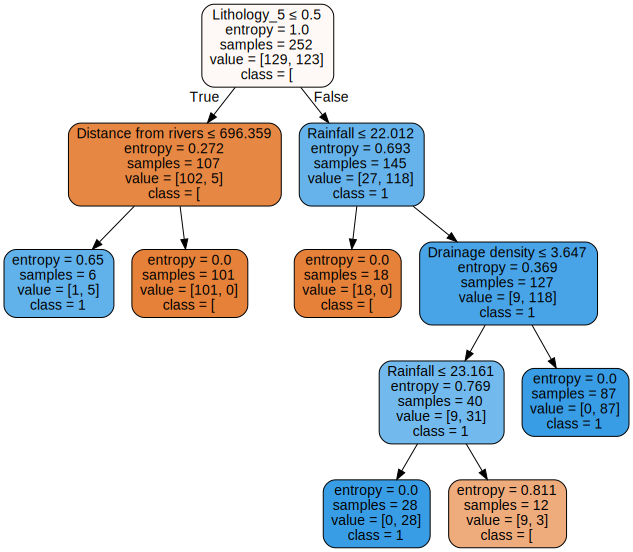

In [15]:
XX = df.drop(['Flood'], axis=1)
print(np.shape(XX))
target = list(df['Flood'].unique())
target = str(target)
feature_names = list(XX.columns)

DT_structure = tree.export_graphviz(DT_model, out_file=None, feature_names=feature_names, class_names=target, filled=True, rounded=True, special_characters=True)  
DT_graph = graphviz.Source(DT_structure)  

DT_graph
#DT_graph.save('DT.jpg')

Random forest (RF) model

In [16]:
parameters = {'n_estimators':np.arange(20,500,20), 'max_depth':np.arange(1,20,1)}
RF_classifier = RandomForestClassifier(criterion="entropy",random_state=0, bootstrap = True)
RF_model_gs = GridSearchCV(RF_classifier, parameters, scoring='accuracy', cv=5, return_train_score=True, n_jobs=-1)
RF_model_gs.fit(X_datasets, Y_datasets)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240, 260,
       280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480])},
             return_train_score=True, scoring='accuracy')

In [17]:
RF_model_gs.best_params_

{'max_depth': 7, 'n_estimators': 180}

ROC-AUC score for test dataset:  0.9912280701754386
Accuracy score for test dataset:  0.9907407407407407
F1 score for test dataset:  0.9911504424778761
Kappa score for test dataset:  0.9814432989690721
jaccard_score for test dataset: 0.9824561403508771


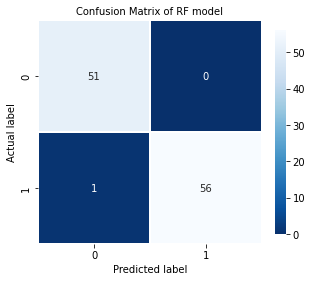

In [18]:
RF_model = RandomForestClassifier(criterion="entropy",random_state=0, bootstrap = True, **RF_model_gs.best_params_)
RF_model.fit(X_datasets, Y_datasets)

Y_test_RF_predict = RF_model.predict(X_test_datasets)
print("ROC-AUC score for test dataset: ", sklearn.metrics.roc_auc_score(Y_test_datasets, Y_test_RF_predict))
print("Accuracy score for test dataset: ", sklearn.metrics.accuracy_score(Y_test_datasets, Y_test_RF_predict))
print("F1 score for test dataset: ", sklearn.metrics.f1_score(Y_test_datasets, Y_test_RF_predict))
print("Kappa score for test dataset: ", sklearn.metrics.cohen_kappa_score(Y_test_datasets, Y_test_RF_predict))
print("jaccard_score for test dataset:", jaccard_score(Y_test_datasets, Y_test_RF_predict))

CM_RF = sklearn.metrics.confusion_matrix(Y_test_datasets, Y_test_RF_predict)
plt.figure(figsize=(5,5))
sns.heatmap(CM_RF, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r', cbar_kws={"shrink": 0.75});
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix of RF model'
plt.title(all_sample_title, size = 10);

In [34]:
Y_predict_best_model_whole_study_area = RF_model.predict_proba(Processed_dataset_whole_study_area)

Susc_map = np.empty((56221839,1))
for ind in range(Data_indices.shape[0]):
  Susc_map[Data_indices[ind,0],0]= Y_predict_best_model_whole_study_area[ind,1]

Susceptibility_map = Susc_map.reshape(7893,7123)

Flood_susceptibility_map = rasterio.open('/content/flood_susceptibility_map_RF.asc',
                                         'w',
                                          driver='GTiff',
                                          height=7893,
                                          width=7123,
                                          count=1,
                                          dtype='float32',
                                          crs='EPSG:32610',
                                          transform = All_points.transform,
                                          nodata = 0 
                                          )
Flood_susceptibility_map.write(Susceptibility_map, 1)
Flood_susceptibility_map.close()

Assessment of the relative importance of each flood conditioning factor using Spearman Analysis

In [35]:
Flood_susceptibility_mapp = rasterio.open('/content/flood_susceptibility_map_RF.asc')
Flood_susceptibility_mapp = Flood_susceptibility_mapp.read(1)
Flood_susceptibility_mapp = Flood_susceptibility_mapp.reshape(-1,1)
print(Flood_susceptibility_mapp.shape)
Flood_susceptibility_map_study_area = Flood_susceptibility_mapp[Data_indices[:,0],0].reshape(-1,1)

for num_ind in range(np.shape(Datasett_whole_study_area_for_spearman_analysis)[1]):
  coef, p = spearmanr(Datasett_whole_study_area_for_spearman_analysis[:,num_ind],Flood_susceptibility_map_study_area)
  print('Spearmans correlation coefficient: %.3f' % coef)

(56221839, 1)
Spearmans correlation coefficient: 0.103
Spearmans correlation coefficient: -0.475
Spearmans correlation coefficient: 0.302
Spearmans correlation coefficient: -0.197
Spearmans correlation coefficient: 0.072
Spearmans correlation coefficient: 0.549
Spearmans correlation coefficient: -0.060
Spearmans correlation coefficient: 0.049
Spearmans correlation coefficient: 0.050
Spearmans correlation coefficient: -0.002
Spearmans correlation coefficient: 0.808
Spearmans correlation coefficient: -0.365
Spearmans correlation coefficient: -0.258


The results of RF to be used in Frequency ration algorithm

In [36]:
Y_predict_binary = RF_model.predict(Processed_dataset_whole_study_area)

Susc_map_binary = np.empty((56221839,1))
for inddd in range(Data_indices.shape[0]):
  Susc_map_binary[Data_indices[inddd,0],0]= Y_predict_binary[inddd]

Susceptibility_map_binary = Susc_map_binary.reshape(7893,7123)

Flood_susceptibility_map_binary = rasterio.open('/content/flood_susceptibility_map_binary.asc',
                                         'w',
                                          driver='GTiff',
                                          height=7893,
                                          width=7123,
                                          count=1,
                                          dtype='float32',
                                          crs='EPSG:32610',
                                          transform = All_points.transform,
                                          nodata = 0 
                                          )
Flood_susceptibility_map_binary.write(Susceptibility_map_binary, 1)
Flood_susceptibility_map_binary.close()

Multi-layer perceptron neural network (MLP-NN) model

In [19]:
import itertools
parameters = {'hidden_layer_sizes':[(1,), (1, 1, 1,), (1, 1, 1, 1, 1,), (1, 1, 1, 1, 1, 1, 1,), (1, 1, 1, 1, 1, 1, 1, 1, 1, ),
                                    (2,), (2, 2, 2,), (2, 2, 2, 2, 2,), (2, 2, 2, 2, 2, 2, 2,), (2, 2, 2, 2, 2, 2, 2, 2, 2, ),
                                    (3,), (3, 3, 3,), (3, 3, 3, 3, 3,), (3, 3, 3, 3, 3, 3, 3,), (3, 3, 3, 3, 3, 3, 3, 3, 3, ),
                                    (4,), (4, 4, 4,), (4, 4, 4, 4, 4,), (4, 4, 4, 4, 4, 4, 4,), (4, 4, 4, 4, 4, 4, 4, 4, 4, ),
                                    (5,), (5, 5, 5,), (5, 5, 5, 5, 5,), (5, 5, 5, 5, 5, 5, 5,), (5, 5, 5, 5, 5, 5, 5, 5, 5, ),
                                    (6,), (6, 6, 6,), (6, 6, 6, 6, 6,), (6, 6, 6, 6, 6, 6, 6,), (6, 6, 6, 6, 6, 6, 6, 6, 6, ),
                                    (7,), (7, 7, 7,), (7, 7, 7, 7, 7,), (7, 7, 7, 7, 7, 7, 7,), (7, 7, 7, 7, 7, 7, 7, 7, 7, ),
                                    (8,), (8, 8, 8,), (8, 8, 8, 8, 8,), (8, 8, 8, 8, 8, 8, 8,), (8, 8, 8, 8, 8, 8, 8, 8, 8, ),
                                    (9,), (9, 9, 9,), (9, 9, 9, 9, 9,), (9, 9, 9, 9, 9, 9, 9,), (9, 9, 9, 9, 9, 9, 9, 9, 9, ),
                                    (10,), (10, 10, 10,), (10, 10, 10, 10, 10,), (10, 10, 10, 10, 10, 10, 10,), (10, 10, 10, 10, 10, 10, 10, 10, 10, )]}
MLP_classifier = MLPClassifier(random_state=0)
MLP_model_gs = GridSearchCV(MLP_classifier, parameters, scoring='accuracy', cv=5, return_train_score=True, n_jobs=-1)
MLP_model_gs.fit(X_datasets, Y_datasets)
#pd.DataFrame(MLP_model_gs.cv_results_)[['param_hidden_layer_sizes', 'mean_train_score', 'mean_test_score']]

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=0), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(1,), (1, 1, 1),
                                                (1, 1, 1, 1, 1),
                                                (1, 1, 1, 1, 1, 1, 1),
                                                (1, 1, 1, 1, 1, 1, 1, 1, 1),
                                                (2,), (2, 2, 2),
                                                (2, 2, 2, 2, 2),
                                                (2, 2, 2, 2, 2, 2, 2),
                                                (2, 2, 2, 2, 2, 2, 2, 2, 2),
                                                (3,), (3, 3, 3),
                                                (3, 3, 3, 3, 3),
                                                (3, 3, 3, 3, 3, 3, 3),
                                                (3, 3, 3, 3, 3, 3, 3, 3, 3),
                                                (4,), (4, 4, 4),
                              

In [20]:
MLP_model_gs.best_params_

{'hidden_layer_sizes': (4, 4, 4)}

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC-AUC score for test dataset:  0.8503611971104231
Accuracy score for test dataset:  0.8518518518518519
F1 score for test dataset:  0.8620689655172413
Kappa score for test dataset:  0.7021716649431231
jaccard_score for test dataset: 0.7575757575757576


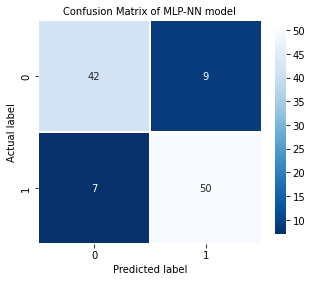

In [21]:
MLP_model_after_CV = MLPClassifier(random_state=0, **MLP_model_gs.best_params_)
MLP_model_after_CV.fit(X_datasets, Y_datasets)

Y_test_MLP_predict = MLP_model_after_CV.predict(X_test_datasets)
print("ROC-AUC score for test dataset: ", sklearn.metrics.roc_auc_score(Y_test_datasets, Y_test_MLP_predict))
print("Accuracy score for test dataset: ", sklearn.metrics.accuracy_score(Y_test_datasets, Y_test_MLP_predict))
print("F1 score for test dataset: ", sklearn.metrics.f1_score(Y_test_datasets, Y_test_MLP_predict))
print("Kappa score for test dataset: ", sklearn.metrics.cohen_kappa_score(Y_test_datasets, Y_test_MLP_predict))
print("jaccard_score for test dataset:", jaccard_score(Y_test_datasets, Y_test_MLP_predict))

CM_MLP = sklearn.metrics.confusion_matrix(Y_test_datasets, Y_test_MLP_predict)
plt.figure(figsize=(5,5))
sns.heatmap(CM_MLP, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r', cbar_kws={"shrink": 0.75});
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix of MLP-NN model'
plt.title(all_sample_title, size = 10);

In [ ]:
Y_predict_MLP_model_after_CV_whole_study_area = MLP_model_after_CV.predict_proba(Processed_dataset_whole_study_area)

Susc_map_MLP_model_after_CV = np.empty((56221839,1))
for ind in range(Data_indices.shape[0]):
  Susc_map_MLP_model_after_CV[Data_indices[ind,0],0]= Y_predict_MLP_model_after_CV_whole_study_area[ind,1]

Susceptibility_map_MLP_model_after_CV = Susc_map_MLP_model_after_CV.reshape(7893,7123)


Flood_susceptibility_map_MLP_model_after_CV = rasterio.open('flood_susceptibility_map_MLP.asc',
                                         'w',
                                          driver='GTiff',
                                          height=7893,
                                          width=7123,
                                          count=1,
                                          dtype='float32',
                                          crs='EPSG:32610',
                                          transform = All_points.transform,
                                          nodata = 0 
                                          )
Flood_susceptibility_map_MLP_model_after_CV.write(Susceptibility_map_MLP_model_after_CV, 1)
Flood_susceptibility_map_MLP_model_after_CV.close()

Adaptive Boosting (AdaBoost) model

In [22]:
parameters = {'n_estimators':np.arange(20,500,20), 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1]}
ADB_classifier = AdaBoostClassifier(random_state=0)
ADB_model_gs = GridSearchCV(ADB_classifier, parameters, scoring='accuracy', cv=5, return_train_score=True, n_jobs=-1)
ADB_model_gs.fit(X_datasets, Y_datasets)
#pd.DataFrame(ADB_model_gs.cv_results_)[['param_learning_rate', 'param_n_estimators', 'mean_train_score', 'mean_test_score']]

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8,
                                           1],
                         'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240, 260,
       280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480])},
             return_train_score=True, scoring='accuracy')

In [23]:
ADB_model_gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 160}

ROC-AUC score for test dataset:  0.9726522187822496
Accuracy score for test dataset:  0.9722222222222222
F1 score for test dataset:  0.9734513274336283
Kappa score for test dataset:  0.9443298969072165
jaccard_score for test dataset: 0.9482758620689655


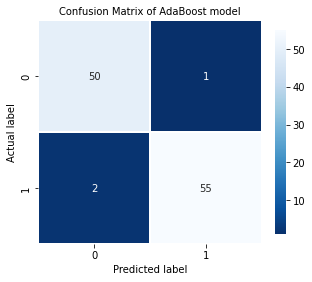

In [24]:
ADB_model = AdaBoostClassifier(random_state=0, **ADB_model_gs.best_params_)
ADB_model.fit(X_datasets, Y_datasets)

Y_test_ADB_predict = ADB_model.predict(X_test_datasets)
print("ROC-AUC score for test dataset: ", sklearn.metrics.roc_auc_score(Y_test_datasets, Y_test_ADB_predict))
print("Accuracy score for test dataset: ", sklearn.metrics.accuracy_score(Y_test_datasets, Y_test_ADB_predict))
print("F1 score for test dataset: ", sklearn.metrics.f1_score(Y_test_datasets, Y_test_ADB_predict))
print("Kappa score for test dataset: ", sklearn.metrics.cohen_kappa_score(Y_test_datasets, Y_test_ADB_predict))
print("jaccard_score for test dataset:", jaccard_score(Y_test_datasets, Y_test_ADB_predict))

CM_ADB = sklearn.metrics.confusion_matrix(Y_test_datasets, Y_test_ADB_predict)
plt.figure(figsize=(5,5))
sns.heatmap(CM_ADB, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r', cbar_kws={"shrink": 0.75});
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix of AdaBoost model'
plt.title(all_sample_title, size = 10);

In [ ]:
Y_predict_ADB_model_whole_study_area = ADB_model.predict_proba(Processed_dataset_whole_study_area)

Susc_map_ADB = np.empty((56221839,1))
for ind in range(Data_indices.shape[0]):
  Susc_map_ADB[Data_indices[ind,0],0]= Y_predict_ADB_model_whole_study_area[ind,1]

Susceptibility_map_ADB = Susc_map_ADB.reshape(7893,7123)


Flood_susceptibility_map_ADB = rasterio.open('flood_susceptibility_map_ADB.asc',
                                         'w',
                                          driver='GTiff',
                                          height=7893,
                                          width=7123,
                                          count=1,
                                          dtype='float32',
                                          crs='EPSG:32610',
                                          transform = All_points.transform,
                                          nodata = 0 
                                          )
Flood_susceptibility_map_ADB.write(Susceptibility_map_ADB, 1)
Flood_susceptibility_map_ADB.close()

Support vector machine (SVM) model

In [25]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] , 'gamma': np.array([0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000])}
SVM_classifier = SVC(probability = True, random_state=0)
SVM_model_gs = GridSearchCV(SVM_classifier, parameters, scoring='accuracy', cv=5, return_train_score=True, n_jobs=-1)
SVM_model_gs.fit(X_datasets, Y_datasets)
#pd.DataFrame(SVM_model_gs.cv_results_)[['param_C', 'param_gamma', 'mean_train_score', 'mean_test_score']]

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=0), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'gamma': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04])},
             return_train_score=True, scoring='accuracy')

In [26]:
SVM_model_gs.best_params_

{'C': 1000, 'gamma': 1e-06}

ROC-AUC score for test dataset:  0.8942208462332301
Accuracy score for test dataset:  0.8981481481481481
F1 score for test dataset:  0.9090909090909092
Kappa score for test dataset:  0.7941787941787941
jaccard_score for test dataset: 0.8333333333333334


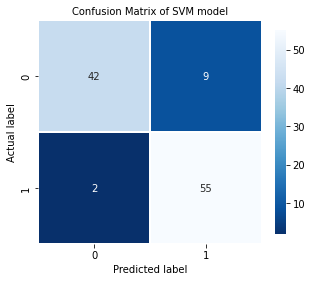

In [27]:
SVM_model = make_pipeline(StandardScaler(), SVC(random_state=0, probability = True, **SVM_model_gs.best_params_))
SVM_model.fit(X_datasets, Y_datasets)

Y_test_SVM_predict = SVM_model.predict(X_test_datasets)
print("ROC-AUC score for test dataset: ", sklearn.metrics.roc_auc_score(Y_test_datasets, Y_test_SVM_predict))
print("Accuracy score for test dataset: ", sklearn.metrics.accuracy_score(Y_test_datasets, Y_test_SVM_predict))
print("F1 score for test dataset: ", sklearn.metrics.f1_score(Y_test_datasets, Y_test_SVM_predict))
print("Kappa score for test dataset: ", sklearn.metrics.cohen_kappa_score(Y_test_datasets, Y_test_SVM_predict))
print("jaccard_score for test dataset:", jaccard_score(Y_test_datasets, Y_test_SVM_predict))

CM_SVM = sklearn.metrics.confusion_matrix(Y_test_datasets, Y_test_SVM_predict)
plt.figure(figsize=(5,5))
sns.heatmap(CM_SVM, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r', cbar_kws={"shrink": 0.75});
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix of SVM model'
plt.title(all_sample_title, size = 10);

In [ ]:
Y_predict_SVM_model_whole_study_area = SVM_model.predict_proba(Processed_dataset_whole_study_area)

Susc_map_SVM = np.empty((56221839,1))
for ind in range(Data_indices.shape[0]):
  Susc_map_SVM[Data_indices[ind,0],0]= Y_predict_SVM_model_whole_study_area[ind,1]

Susceptibility_map_SVM = Susc_map_SVM.reshape(7893,7123)


Flood_susceptibility_map_SVM = rasterio.open('flood_susceptibility_map_SVM.asc',
                                         'w',
                                          driver='GTiff',
                                          height=7893,
                                          width=7123,
                                          count=1,
                                          dtype='float32',
                                          crs='EPSG:32610',
                                          transform = All_points.transform,
                                          nodata = 0 
                                          )
Flood_susceptibility_map_SVM.write(Susceptibility_map_SVM, 1)
Flood_susceptibility_map_SVM.close()

Logistic Regression (LR)

In [ ]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty':['l1', 'l2', 'elasticnet']}
LR_classifier = LogisticRegression(random_state=0)
LR_model_gs = GridSearchCV(LR_classifier, parameters, scoring='accuracy', cv=5, return_train_score=True, n_jobs=-1)
LR_model_gs.fit(X_datasets, Y_datasets)

In [29]:
LR_model_gs.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

ROC-AUC score for test dataset:  0.9256965944272446
Accuracy score for test dataset:  0.9259259259259259
F1 score for test dataset:  0.9298245614035088
Kappa score for test dataset:  0.8513931888544892
jaccard_score for test dataset: 0.8688524590163934


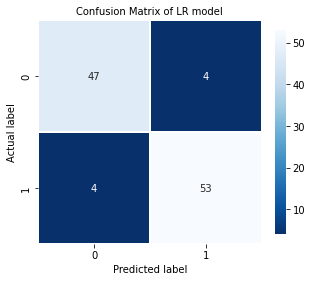

In [30]:
LogisticRegression_model = make_pipeline(StandardScaler(), LogisticRegression(random_state=0, **LR_model_gs.best_params_))
LogisticRegression_model.fit(X_datasets, Y_datasets)

Y_test_LogisticRegression_predict = LogisticRegression_model.predict(X_test_datasets)
print("ROC-AUC score for test dataset: ", sklearn.metrics.roc_auc_score(Y_test_datasets, Y_test_LogisticRegression_predict))
print("Accuracy score for test dataset: ", sklearn.metrics.accuracy_score(Y_test_datasets, Y_test_LogisticRegression_predict))
print("F1 score for test dataset: ", sklearn.metrics.f1_score(Y_test_datasets, Y_test_LogisticRegression_predict))
print("Kappa score for test dataset: ", sklearn.metrics.cohen_kappa_score(Y_test_datasets, Y_test_LogisticRegression_predict))
print("jaccard_score for test dataset:", jaccard_score(Y_test_datasets, Y_test_LogisticRegression_predict))

CM_LogisticRegression = sklearn.metrics.confusion_matrix(Y_test_datasets, Y_test_LogisticRegression_predict)
plt.figure(figsize=(5,5))
sns.heatmap(CM_LogisticRegression, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r', cbar_kws={"shrink": 0.75});
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix of LR model'
plt.title(all_sample_title, size = 10);

In [ ]:
Y_predict_LR_model_whole_study_area = LogisticRegression_model.predict_proba(Processed_dataset_whole_study_area)

Susc_map_LR = np.empty((56221839,1))
for ind in range(Data_indices.shape[0]):
  Susc_map_LR[Data_indices[ind,0],0]= Y_predict_LR_model_whole_study_area[ind,1]

Susceptibility_map_LR = Susc_map_LR.reshape(7893,7123)


Flood_susceptibility_map_LR = rasterio.open('flood_susceptibility_map_LR.asc',
                                         'w',
                                          driver='GTiff',
                                          height=7893,
                                          width=7123,
                                          count=1,
                                          dtype='float32',
                                          crs='EPSG:32610',
                                          transform = All_points.transform,
                                          nodata = 0 
                                          )
Flood_susceptibility_map_LR.write(Susceptibility_map_LR, 1)
Flood_susceptibility_map_LR.close()

ROC curves

ROC-AUC score for DT:  0.9688682490540075
ROC-AUC score for RF:  0.9934640522875816
ROC-AUC score for MLP-NN:  0.9552803577571379
ROC-AUC score for ADB:  0.9941520467836257
ROC-AUC score for SVM:  0.9845201238390093
ROC-AUC score for LR:  0.9889920880632954


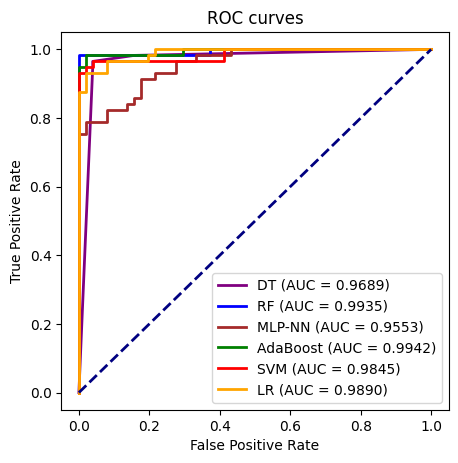

In [31]:
figure(figsize=(5,5), dpi=100)

# Decision Tree (DT)
Y_test_DT_predict_probability = DT_model.predict_proba(X_test_datasets)
y_score_DT = Y_test_DT_predict_probability[:,1]
false_positive_rate_DT, true_positive_rate_DT, threshold_DT = roc_curve(Y_test_datasets, y_score_DT)
print('ROC-AUC score for DT: ', sklearn.metrics.roc_auc_score(Y_test_datasets, y_score_DT))
plt.plot(false_positive_rate_DT, true_positive_rate_DT, color="purple", lw= 2, label="DT (AUC = %0.4f)" % auc(false_positive_rate_DT, true_positive_rate_DT))

# Random Forest (RF)
Y_test_RF_predict_probability = RF_model.predict_proba(X_test_datasets)
y_score_RF = Y_test_RF_predict_probability[:,1]
#print("y_score_RF: ", y_score_RF)
false_positive_rate_RF, true_positive_rate_RF, threshold_LRF = roc_curve(Y_test_datasets, y_score_RF)
print('ROC-AUC score for RF: ', sklearn.metrics.roc_auc_score(Y_test_datasets, y_score_RF))
plt.plot(false_positive_rate_RF, true_positive_rate_RF, color="blue", lw= 2, label="RF (AUC = %0.4f)" % auc(false_positive_rate_RF, true_positive_rate_RF))

# Multi layer perceptron neural network (MLP-NN) model
Y_test_MLP_predict_probability = MLP_model_after_CV.predict_proba(X_test_datasets)
y_score_MLP = Y_test_MLP_predict_probability[:,1]
false_positive_rate_MLP, true_positive_rate_MLP, threshold_MLP = roc_curve(Y_test_datasets, y_score_MLP)
print('ROC-AUC score for MLP-NN: ', sklearn.metrics.roc_auc_score(Y_test_datasets, y_score_MLP))
plt.plot(false_positive_rate_MLP, true_positive_rate_MLP, color="brown", lw= 2, label="MLP-NN (AUC = %0.4f)" % auc(false_positive_rate_MLP, true_positive_rate_MLP))

# Adaptive Boosting (AdaBoost) model
Y_test_ADB_predict_probability = ADB_model.predict_proba(X_test_datasets)
y_score_ADB = Y_test_ADB_predict_probability[:,1]
false_positive_rate_ADB, true_positive_rate_ADB, threshold_ADB = roc_curve(Y_test_datasets, y_score_ADB)
print('ROC-AUC score for ADB: ', sklearn.metrics.roc_auc_score(Y_test_datasets, y_score_ADB))
plt.plot(false_positive_rate_ADB, true_positive_rate_ADB, color="green", lw= 2, label="AdaBoost (AUC = %0.4f)" % auc(false_positive_rate_ADB, true_positive_rate_ADB))

# Support vector machines (SVM)
Y_test_SVM_predict_probability = SVM_model.predict_proba(X_test_datasets)
y_score_SVM = Y_test_SVM_predict_probability[:,1]
false_positive_rate_SVM, true_positive_rate_SVM, threshold_SVM = roc_curve(Y_test_datasets, y_score_SVM)
print('ROC-AUC score for SVM: ', sklearn.metrics.roc_auc_score(Y_test_datasets, y_score_SVM))
plt.plot(false_positive_rate_SVM, true_positive_rate_SVM, color="red", lw= 2, label="SVM (AUC = %0.4f)" % auc(false_positive_rate_SVM, true_positive_rate_SVM))

# Logistic Regression (LR)
Y_test_LogisticRegression_predict_probability = LogisticRegression_model.predict_proba(X_test_datasets)
y_score_LogisticRegression = Y_test_LogisticRegression_predict_probability[:,1]
false_positive_rate_LR, true_positive_rate_LR, threshold_LR = roc_curve(Y_test_datasets, y_score_LogisticRegression)
print('ROC-AUC score for LR: ', sklearn.metrics.roc_auc_score(Y_test_datasets, y_score_LogisticRegression))
plt.plot(false_positive_rate_LR, true_positive_rate_LR, color="orange", lw= 2, label="LR (AUC = %0.4f)" % auc(false_positive_rate_LR, true_positive_rate_LR))

plt.title('ROC curves')
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")

plt.show()